In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
anti = pd.read_csv("../Reddit_Sentiments/antilockdown_sentiments.csv")
corona = pd.read_csv("../Reddit_Sentiments/corona_sentiments.csv")
covid19 = pd.read_csv("../Reddit_Sentiments/covid19_sentiments.csv")

In [3]:
all_data = pd.concat([anti,corona,covid19])

In [4]:
def get_date(datetime_string):
    date_time = datetime_string.split()[0]
    date_obj = datetime.strptime(date_time, '%Y-%m-%d').date()
    return date_obj

In [7]:
all_data['date'] = all_data['timestamp'].apply(get_date)
all_data['date'].unique()

array([datetime.date(2020, 8, 30), datetime.date(2020, 4, 20),
       datetime.date(2020, 5, 1), datetime.date(2020, 5, 23),
       datetime.date(2020, 12, 13), datetime.date(2020, 11, 15),
       datetime.date(2020, 4, 26), datetime.date(2021, 1, 3),
       datetime.date(2021, 6, 7), datetime.date(2020, 12, 1),
       datetime.date(2020, 11, 24), datetime.date(2020, 5, 8),
       datetime.date(2021, 2, 10), datetime.date(2021, 7, 24),
       datetime.date(2021, 7, 25), datetime.date(2021, 1, 2),
       datetime.date(2020, 4, 23), datetime.date(2020, 5, 17),
       datetime.date(2020, 6, 18), datetime.date(2020, 11, 12),
       datetime.date(2020, 3, 12), datetime.date(2020, 6, 25),
       datetime.date(2020, 11, 1), datetime.date(2020, 5, 18),
       datetime.date(2021, 1, 4), datetime.date(2020, 5, 12),
       datetime.date(2020, 11, 2), datetime.date(2020, 4, 1),
       datetime.date(2020, 3, 20), datetime.date(2020, 5, 9),
       datetime.date(2021, 12, 19), datetime.date(2020, 4, 

In [9]:
positive_data = all_data[all_data['sentiment_polarity_summary']=='positive']
negative_data = all_data[all_data['sentiment_polarity_summary']=='negative']
neutral = all_data[all_data['sentiment_polarity_summary']=='neutral']

In [10]:
positive_count = positive_data.groupby(['date'])['sentiment_polarity_summary'].count()
negative_count = negative_data.groupby(['date'])['sentiment_polarity_summary'].count()
neutral_count = neutral.groupby(['date'])['sentiment_polarity_summary'].count()

In [19]:
# convert date obj to str
# def date_to_str(date_obj):
#     return date_obj.strftime("%Y-%m-%d")
    
# all_data['date'] = all_data['date'].apply(date_to_str)
positive_datelist = list(positive_data['date'].unique())
positive_datelist.sort()
negative_datelist = list(negative_data['date'].unique())
negative_datelist.sort()
# neutral_datelist = list(neutral['date'].unique())
# neutral_datelist.sort()


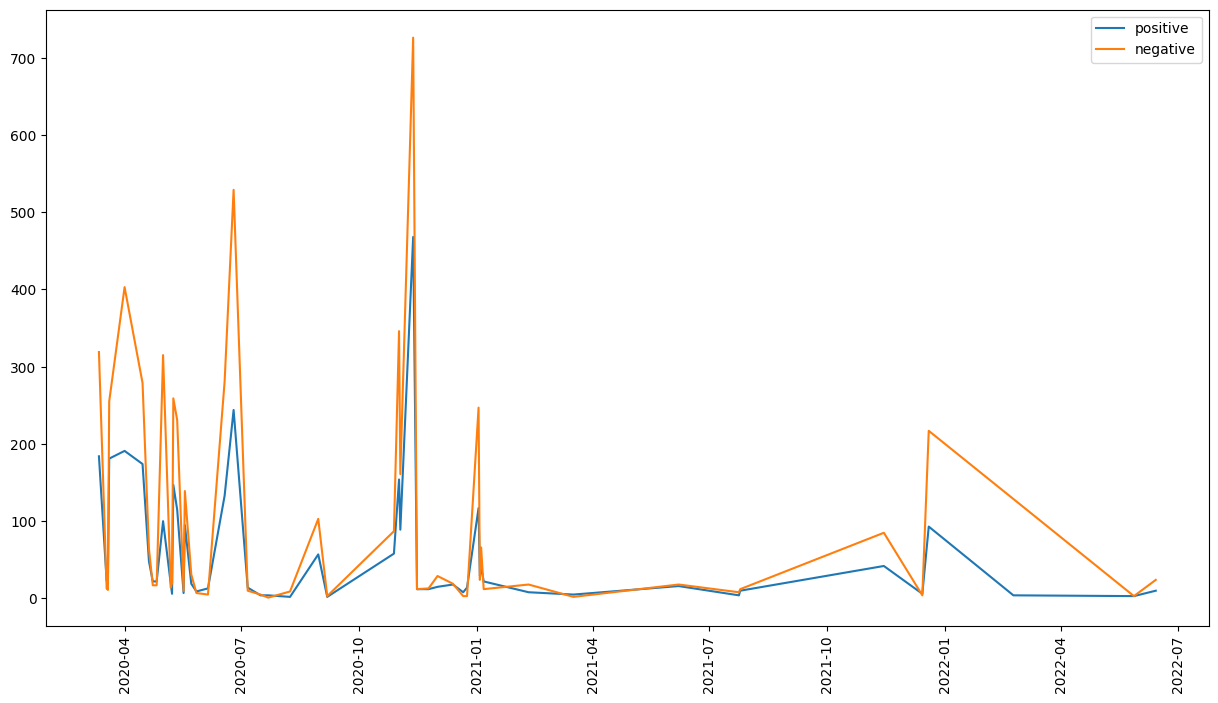

In [21]:
plt.figure(figsize=(15,8))
plt.plot(positive_datelist, positive_count, label='positive')
plt.plot(negative_datelist, negative_count, label='negative')
# plt.plot(neutral_datelist, neutral_count, label='neutral')
plt.xticks(rotation=90)
plt.legend()
plt.show()
